<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


  

## Começando

Sabemos que dentro de aprendizado supervisionado vamos trabalhar com dois tipos de problemas:

- [x]  Classificação - (Já conhecemos o KNN)
- [ ]  Regressão - (Objetivo de hoje)

### Uma intuição sobre problemas que envolvem cada um deles:

        Classificação --> Resultados discretos (categóricos).
        Regressão --> Resultados numéricos e contínuos.


### Regressão linear

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

![reta](/aulas/lab03/reta.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/reta.png?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

![plano](/aulas/lab03/plano.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/plano.png?raw=1" width="450">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.


## Bora lá!!

Vamos juntos realizar um projeto, do começo ao fim, usando regressão.



## Definição do problema

O conjunto de dados que vamos utilizar foi retirado e pode ser encontrado no kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias em um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade da herança indígena Pima.

O conjunto de dados consiste em diversas variáveis ​​de previsão médica e uma variável de destino, resultado. As variáveis ​​preditoras, dados de entrada, incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

Considere a variável Resultado com valor 1 para True e 0 para False

Informações sobre os atributos


Pregnancies / Gravidez - Quantidade de gestações

Glucose / Glicose - Concentração de glicose no plasma duas horas em um teste oral de tolerância à glicose

Blood Pressure / Pressão sanguínea - Pressão arterial diastólica (mm Hg)

SkinThickness / Espessura da pele - Tríceps espessura da dobra da pele (mm)

Isulin / Insulina - Insulina sérica de 2 horas (mu U / ml)

BMI / IMC - Índice de massa corporal (peso em kg / (altura em m) ^ 2)

Diabetes Pedigree Function / Função de pedigree do diabéticos - Função pedigree do diabéticos

Age / Idade 

*Outcome / Resultado - A variável de classe (0 ou 1)


### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado, não-supervisionado ou aprendizado por reforço?

R:

    Classificação, regressão ou clusterização?

R:


In [1]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


O scikit-learn possui diversos dataset em seu banco de dados, um deles é o dataset que vamos utilizar hoje.

faça o import direto usando ***sklearn.datasets***

caso queira, você pode fazer o downlod do dataset direto do site e importar em seu projeto.



In [2]:
#from sklearn.datasets import load_boston


from sklearn import datasets, linear_model

#boston_dataset = load_boston()
#diabetes_dataset = datasets.load_diabetes()
#para conhecer o que foi importado do dataset 
#diabetes_dataset.keys()
# arquivo diabetes
df = pd.read_csv('Dados.csv')

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Lê e carrega o arquivo para a memória
#df = pd.read_csv(url)

# Define o nome das colunas
#header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Lê e carrega o arquivo para a memória
#df = pd.read_csv(url, header=None, names=header)

In [3]:
# vamos carregar no pandas apenas data com os dados e "feature_names" com os nomes dos atributos
#df = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#vamos adicionar mais uma coluna ao nosso dataframe com o target (alvo que vamos fazer a predição)
#df['Outcome'] = df.target

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Desafio 2

Use os metodos info() e describe() para exibir as informações do dataframe e responda:

Existe dados faltantes?

Qual o tamanho do dataset, quantas linhas e quantas colunas?



In [6]:
# Mostra informações sobre o dataframe em si
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:


df.corr()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Desafio 3

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


In [8]:
## Sua resposta e seus gráficos para análisar..







<Axes: >

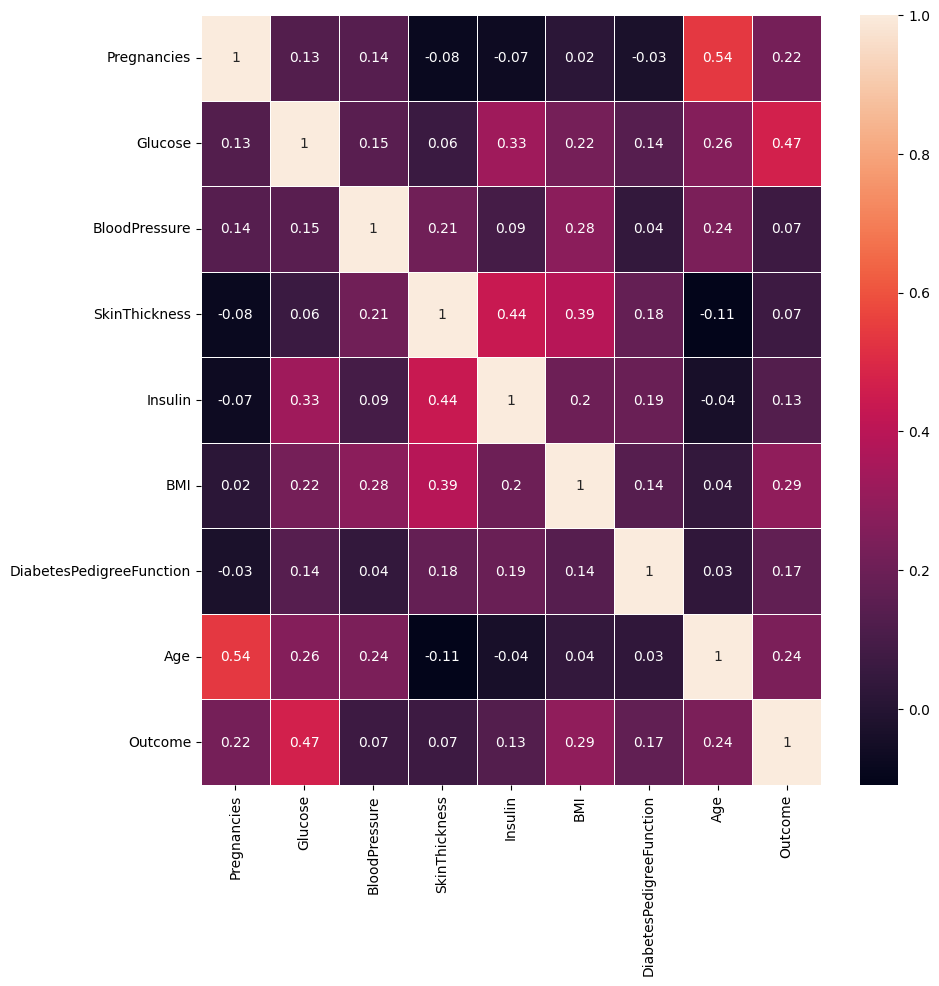

In [9]:
#Vamos explorar um pouco uma matrix de correlação

#Vamos explorar um pouco uma matrix de correlação

import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Desafio 4

Analisando a matriz de correlação acima responda:

Qual feature possue a maior correlação ***positiva*** com o target? Glucose

Qual feature possue a maior correlação ***negativa*** com o target? BMI


<Axes: xlabel='Glucose', ylabel='Age'>

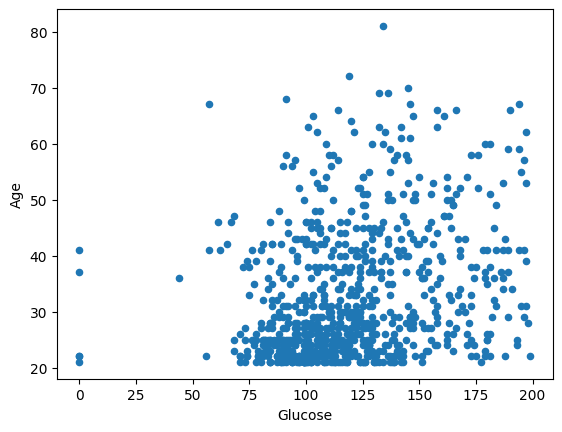

In [10]:
df.plot.scatter('Glucose', 'Age')

<Axes: xlabel='BMI', ylabel='Glucose'>

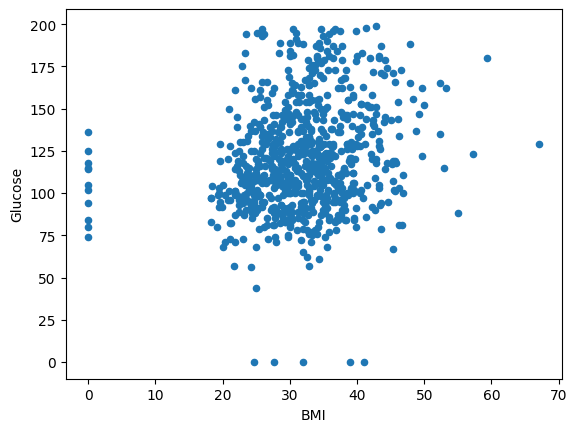

In [11]:
df.plot.scatter('BMI', 'Glucose')

## PARE!!!

A análise feita no desafio 2 e 3 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [28]:
# Vamos treinar nosso modelo com 2 dois atributos independentes
# para predizer o valor de saida
X = df[['Pregnancies','Glucose', 'BloodPressure',	'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] ### teste com duas entradas
# 'Pregnancies','Glucose', 'BloodPressure',	'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',Age
#X = df
#X = df[['RM']]            ### teste com uma entrada
#X = df.drop(['MEDV'], axis=1)     ### teste com todas as entradas

Y = df['Outcome']             
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")
print ("X")
X.info()
print("Y")
Y.info()

Formato das tabelas de dados (768, 8) e saidas (768,)
X
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
Y
<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***


***scikit-learn*** Caso ainda não tenha instalado, no terminal digite:
- pip install scikit-learn



In [29]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [30]:
#Primeiras linhas do dataframe 
X_treino.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
520,2,68,70,32,66,25.0,0.187,25
701,6,125,78,31,0,27.6,0.565,49
109,0,95,85,25,36,37.4,0.247,24
77,5,95,72,33,0,37.7,0.370,27
482,4,85,58,22,49,27.8,0.306,28


In [31]:
Y_treino.head()

520    0
701    1
109    1
77     0
482    0
Name: Outcome, dtype: int64

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn. 
Treinar um modelo no Scikit-Learn é simples: basta criar o regressor, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [33]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)




LinearRegression()

Pronto!! bora testar se esta funcionando....


In [34]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [ 0.21452007  0.0936931   0.16504782  0.41509247  0.46249649  0.21529802
  0.41863166  0.58444991  0.70085839  0.51335176  0.35416571  0.17899799
  0.00234957  0.71145594  0.26577903 -0.02997493  0.45995741  0.67865869
  0.14364056  0.42918942  0.81010553  0.33208775  0.27173356  0.32229747
  0.04224308  0.2041664   0.43309823  1.02155857  0.33674173  0.36342683
  0.68604303  0.1532063  -0.02824738  0.03616755  0.53029714  0.15275585
  0.34717541  0.14887172  0.67093647  0.50705573  0.35017838  0.84493145
  0.40912862  0.28876716  0.76640283  0.72452924  0.27101697  0.63674987
  0.27352783  0.71957393  0.7305466   0.6832875   0.08135368  0.80584992
  0.57297648  0.10444628  0.30128899 -0.47150037  0.35464657  0.3864706
  0.60478408  0.11493292  0.48120502  0.3772459   0.11414581  0.49448933
  0.361732    0.36274294  0.71708062  0.53334523  0.63015987 -0.0020761
  0.36808403  0.33465358  0.04565947  0.37655034  0.14948783 -0.03020519

In [35]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_BMI + {} * X_Glucose'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_BMI'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  -0.860594818662918
(B) Inclinação:  [ 0.01886482  0.00616312 -0.00270724  0.00016148 -0.00024278  0.01417833
  0.08346673  0.00284068]
Nossa equação é: Y_pred = -0.86 + 0.02 * X_BMI + 0.01 * X_Glucose


Text(0, 0.5, 'Valor Predito')

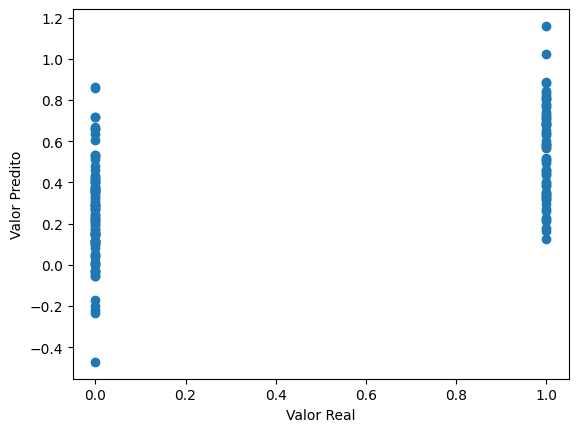

In [36]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

## Avaliando o modelo treinado

Vamos colocar alguns valores e ver a predição do classificador. 

In [37]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste)) # quanto maior o valor melhor

Soma dos Erros ao Quadrado (SSE): 27 
Erro Quadrático Médio (MSE): 0.18
Erro Médio Absoluto (MAE): 0.35
Raiz do Erro Quadrático Médio (RMSE): 0.42 
R2-score: -1.25


### Desafio 5

Refaça o notebook substituindo o algoritmo de regressão linear por outro algoritmo de regressão e compare os resultados obtidos.

Sugestão de alguns algoritmos de ML para problemas de regressão:

| Nome | Vantagem | Desvantagem | Exemplo sklearn |
|:---:|:---:|:---:|:---:|
| Regressão Linear | Fácil de entender e implementar | Pode não ser adequado para problemas mais complexos | from sklearn.linear_model import LinearRegression<br><br><br>model = LinearRegression()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Árvores de decisão | Fácil de entender e visualizar | Pode levar a overfitting se a árvore for muito grande | from sklearn.tree import DecisionTreeRegressor<br><br><br>model = DecisionTreeRegressor()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Random Forest | Mais robusto e geralmente mais preciso do que uma única árvore de decisão | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import RandomForestRegressor<br><br><br>model = RandomForestRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Support Vector Regression (SVR) | Lida bem com dados multidimensionais e não lineares | Pode ser difícil de escolher o kernel correto e ajustar os hiperparâmetros | from sklearn.svm import SVR<br><br><br>model = SVR(kernel='rbf')<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Gradient Boosting | Preciso e lida bem com dados multidimensionais e não lineares | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import GradientBoostingRegressor<br><br><br>model = GradientBoostingRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
|  |  |  |  |




In [21]:
## implemente sua sua solução....




## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



Soma dos Erros ao Quadrado (SSE): 602124 
Erro Quadrático Médio (MSE): 20070.81
Erro Médio Absoluto (MAE): 104.66
Raiz do Erro Quadrático Médio (RMSE): 141.67 
R2-score: 0.55


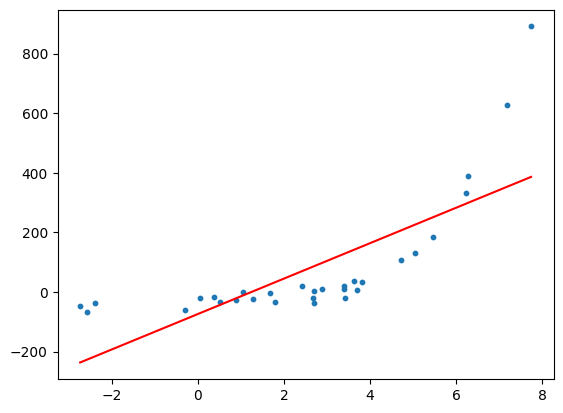

In [3]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

### Desafio 6 

Faça uma função que calcula a regressão polinomial (basicamente colocar o codigo acima em uma função), agora faça um código que chama essa função alterando o grau do polinomio de 2 até 10, basicamente um loop for que chama a função criada. 

Análise os resultados obtidos e determine qual o melhor grau polinomio do seu modelo. 

In [2]:
## Implemente sua solução




